In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [4]:
class AgentState(TypedDict):
  number1: int
  number2: int
  operation: str
  result: int

In [30]:
def adder(state: AgentState) -> AgentState:
  """Adds two number"""
  state['result'] = state['number1']+state['number2']
  return state

def subtract(state: AgentState) -> AgentState:
  """Subtracts two number"""
  state['result'] = abs(state['number1'] - state['number2'])
  return state

def invalid(state: AgentState) -> AgentState:
  """Raise issue in operation, only addition and subtraction supported"""
  
  print("INVALID OPERATION! \nOnly `+` and `-` operations could be executed.")
  return state

def decide_next_node(state: AgentState) -> str:
  """This nodes decides the next node of graph"""
  
  if state['operation']=="+":
    return "addition_operation"
  elif state['operation'] =="-":
    return "subtraction_operation"
  return "Invalid_operation"

In [31]:
graph = StateGraph(state_schema=AgentState)

graph.add_node("addition_node",adder)
graph.add_node("subtraction_node",subtract)
graph.add_node("invalid_operation_node",invalid)
graph.add_node("router", lambda state: state) #passthrough function

graph.add_edge(START, "router")
graph.add_conditional_edges(
  source="router",
  path=decide_next_node,
  path_map = { #edge: node
    "addition_operation": "addition_node",
    "subtraction_operation": "subtraction_node",
    "Invalid_operation": "invalid_operation_node"
  }
)

graph.add_edge("addition_node",END)
graph.add_edge("subtraction_node",END)
graph.add_edge("invalid_operation_node",END)

app = graph.compile()

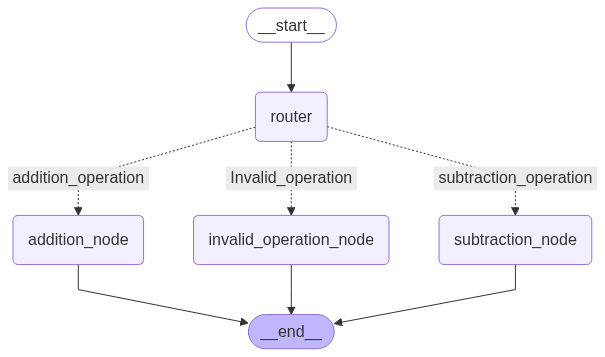

In [32]:
app

In [33]:
result = app.invoke({
  "number1": 2,
  "number2": 7,
  "operation": "*"
})

INVALID OPERATION! 
Only `+` and `-` operations could be executed.


In [34]:
result

{'number1': 2, 'number2': 7, 'operation': '*'}